In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import models
from sklearn.model_selection import StratifiedKFold


In [2]:
## NSL Dataset has the following features

column_names = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
'wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell',
'su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds',
'is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate',
'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count',
'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate', 'class','misc']
dataset = pd.read_csv('NSL-KDD/KDDTrain+.txt', header = None,names=column_names,index_col=False)


In [3]:
## features relevant to SNORT's connection data

column_names = ["duration", "protocol_type", "src_bytes", "dst_bytes", "count", "srv_count", "class"]
dataset=dataset[column_names]

In [4]:
## final output class (since we are doing binary classification) as 'attack' or 'normal'

dataset['class']= dataset['class'].replace(['back', 'buffer_overflow', 'ftp_write', 'guess_passwd', 'imap', 'ipsweep', 'land', 'loadmodule', 'multihop', 'neptune', 'nmap', 'perl', 'phf', 'pod', 'portsweep', 'rootkit', 'satan', 'smurf', 'spy', 'teardrop', 'warezclient', 'warezmaster'], 'attack')
x = dataset.iloc[:, :-1].values
y = dataset['class'].values

In [5]:
#encoding categorical data

from sklearn.preprocessing import LabelEncoder
labelencoder_x_1 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])

In [6]:
dataset.head()

,duration,protocol_type,src_bytes,dst_bytes,count,srv_count,class
0,0,tcp,491,0,2,2,normal
1,0,udp,146,0,13,1,normal
2,0,tcp,0,0,123,6,attack
3,0,tcp,232,8153,5,5,normal
4,0,tcp,199,420,30,32,normal


In [7]:
## spliting dataset into input x and output y

x=pd.DataFrame(x, columns = column_names[:-1])

In [8]:
dataset.corr()

,duration,src_bytes,dst_bytes,count,srv_count
duration,1.000000,0.070737,0.034878,-0.079042,-0.039470
src_bytes,0.070737,1.000000,0.000204,-0.005152,-0.002792
dst_bytes,0.034878,0.000204,1.000000,-0.003543,-0.001754
count,-0.079042,-0.005152,-0.003543,1.000000,0.471079
srv_count,-0.039470,-0.002792,-0.001754,0.471079,1.000000


In [62]:
## running k fold cross validation on training dataset for all algorithms and recording accuracy, false alarm rate

accuracy={'Random Forest Classifier':[],'AdaBoost Classifier':[],'MLP Classifier':[],'Gradient Boosting Classifier':[],'Logistic Regression':[],'SGD':[],'Decision Tree':[],'KNN Classifier':[],'Histogram Based Gradient Boosting Classifier':[],'Gaussian Naive Bias':[]}
false_alarm_rate={'Random Forest Classifier':[],'AdaBoost Classifier':[],'MLP Classifier':[],'Gradient Boosting Classifier':[],'Logistic Regression':[],'SGD':[],'Decision Tree':[],'KNN Classifier':[],'Histogram Based Gradient Boosting Classifier':[],'Gaussian Naive Bias':[]}

folds = StratifiedKFold(n_splits=7)
for train_index, test_index in folds.split(x,y) :
    X_train, X_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    acc,far=models.rfc(X_train,X_test,y_train,y_test)
    accuracy['Random Forest Classifier'].append(acc)
    false_alarm_rate['Random Forest Classifier'].append(far)
    acc,far=models.abc(X_train,X_test,y_train,y_test)
    accuracy['AdaBoost Classifier'].append(acc)
    false_alarm_rate['AdaBoost Classifier'].append(far)
    acc,far=models.mlp(X_train,X_test,y_train,y_test)
    accuracy['MLP Classifier'].append(acc)
    false_alarm_rate['MLP Classifier'].append(far)
    acc,far=models.GBclassifier(X_train,X_test,y_train,y_test)
    accuracy['Gradient Boosting Classifier'].append(acc)
    false_alarm_rate['Gradient Boosting Classifier'].append(far)
    acc,far=models.lr(X_train,X_test,y_train,y_test,max_iter=350)
    accuracy['Logistic Regression'].append(acc) #Max Iterations are increased for convergence
    false_alarm_rate['Logistic Regression'].append(far) #Max Iterations are increased for convergence
    acc,far=models.SGD(X_train,X_test,y_train,y_test)
    accuracy['SGD'].append(acc)
    false_alarm_rate['SGD'].append(far)
    acc,far=models.DT(X_train,X_test,y_train,y_test)
    accuracy['Decision Tree'].append(acc)
    false_alarm_rate['Decision Tree'].append(far)
    acc,far=models.KNN(X_train,X_test,y_train,y_test)
    accuracy['KNN Classifier'].append(acc)
    false_alarm_rate['KNN Classifier'].append(far)
    acc,far=models.Histclassifier(X_train,X_test,y_train,y_test)
    accuracy['Histogram Based Gradient Boosting Classifier'].append(acc)
    false_alarm_rate['Histogram Based Gradient Boosting Classifier'].append(far)
    acc,far=models.GNB(X_train,X_test,y_train,y_test)
    accuracy['Gaussian Naive Bias'].append(acc)
    false_alarm_rate['Gaussian Naive Bias'].append(far)
    #acc,far=models.MNB(X_train,X_test,y_train,y_test)
    #accuracy['Multinomial Naive Bias'].append(acc)
    #false_alarm_rate['Multinomial Naive Bias'].append(far)
    
    

In [63]:
## Calculating average accuracy for all algorithms

import math

avg_accuracy={}
for key in accuracy.keys() :
    avg_accuracy[key]=round(float(np.sum(accuracy[key])*100/len(accuracy[key])),1)

In [64]:
avg_accuracy

{'Random Forest Classifier': 98.3,
 'AdaBoost Classifier': 96.0,
 'MLP Classifier': 91.8,
 'Gradient Boosting Classifier': 97.9,
 'Logistic Regression': 68.7,
 'SGD': 36.1,
 'Decision Tree': 98.2,
 'KNN Classifier': 98.1,
 'Histogram Based Gradient Boosting Classifier': 98.2,
 'Gaussian Naive Bias': 53.4}

In [65]:
## calculating average false alarm rate for all algorithms

avg_far={}
for key in false_alarm_rate.keys() :
    avg_far[key]=round(np.sum(false_alarm_rate[key])/len(false_alarm_rate[key]),4)

In [66]:
avg_far

{'Random Forest Classifier': 0.0321,
 'AdaBoost Classifier': 0.0791,
 'MLP Classifier': 0.1747,
 'Gradient Boosting Classifier': 0.0397,
 'Logistic Regression': 180.774,
 'SGD': 22.3831,
 'Decision Tree': 0.0329,
 'KNN Classifier': 0.035,
 'Histogram Based Gradient Boosting Classifier': 0.0334,
 'Gaussian Naive Bias': 0.8844}

In [14]:
## Creating an ENSEMBLE model using RandomForrest and HistGradientBoost classifiers

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

#create a dictionary of our models
estimators=[('RF', RandomForestClassifier()), ('hbr', HistGradientBoostingClassifier())]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')

In [15]:
## training the ensemble

accuracy_ens=[]
for train_index, test_index in folds.split(x,y) :
    X_train, X_test = x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    ensemble.fit(X_train,y_train)
    y_pred= ensemble.predict(X_test)
    accuracy_ens.append(accuracy_score(y_test,y_pred))

In [16]:
## accuracy for the ensemble model

np.sum(accuracy_ens)/len(accuracy_ens)

0.9828058320935699

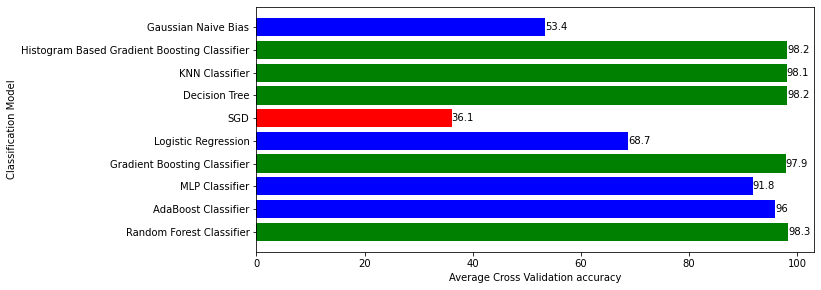

In [67]:
## plotting average (cross validation) accuracy for all algorithms in one place for comparision

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,4.5)
fig, ax = plt.subplots()
bars=ax.barh(*zip(*avg_accuracy.items()),color=['green', 'blue', 'blue', 'green', 'blue', 'red', 'green', 'green', 'green', 'blue', 'red'])
ax.bar_label(bars)
plt.xlabel('Average Cross Validation accuracy')
plt.ylabel('Classification Model')
plt.show()

##### Displaying evaluation metrics (accuracy and false alarm rate) for all algorithms

In [68]:
model=avg_accuracy.keys()

In [69]:
acc=avg_accuracy.values()

In [70]:
df1=pd.DataFrame({'Classification Model':model,'Cross validation accuracy':acc})

In [71]:
df1['Cross validation accuracy']=df1['Cross validation accuracy']

In [72]:
df1

,Classification Model,Cross validation accuracy
0,Random Forest Classifier,98.3
1,AdaBoost Classifier,96.0
2,MLP Classifier,91.8
3,Gradient Boosting Classifier,97.9
4,Logistic Regression,68.7
5,SGD,36.1
6,Decision Tree,98.2
7,KNN Classifier,98.1
8,Histogram Based Gradient Boosting Classifier,98.2
9,Gaussian Naive Bias,53.4


In [73]:
far=list(avg_far.values())

In [74]:
model=avg_far.keys()

In [76]:
df=pd.DataFrame({'Classification Model':model,'False Alarm Rate':far})

In [77]:
df

,Classification Model,False Alarm Rate
0,Random Forest Classifier,0.0321
1,AdaBoost Classifier,0.0791
2,MLP Classifier,0.1747
3,Gradient Boosting Classifier,0.0397
4,Logistic Regression,18.0774
5,SGD,22.3831
6,Decision Tree,0.0329
7,KNN Classifier,0.0350
8,Histogram Based Gradient Boosting Classifier,0.0334
9,Gaussian Naive Bias,0.8844


In [78]:
df1['False Alarm Rate']=df['False Alarm Rate']
df1

,Classification Model,Cross validation accuracy,False Alarm Rate
0,Random Forest Classifier,98.3,0.0321
1,AdaBoost Classifier,96.0,0.0791
2,MLP Classifier,91.8,0.1747
3,Gradient Boosting Classifier,97.9,0.0397
4,Logistic Regression,68.7,18.0774
5,SGD,36.1,22.3831
6,Decision Tree,98.2,0.0329
7,KNN Classifier,98.1,0.0350
8,Histogram Based Gradient Boosting Classifier,98.2,0.0334
9,Gaussian Naive Bias,53.4,0.8844
